<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/los.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import sqlite3
import argparse
import json
import pprint
import requests
import sys
import urllib
from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode
%matplotlib inline
import matplotlib.pyplot as plt


In [56]:
crime_df = pd.read_csv('nnn.csv')
crime_df.head()

,DRNumber,DateOccurred,CrimeCode,CrimeCodeDescription,PremiseCode,PremiseDescription,rate
0,170209449,4/21/17,510,JEWELS - STOLEN,101.0,STREET,8
1,170206243,02-11-2017,510,JEWELS - STOLEN,101.0,STREET,21
2,170311599,4/25/17,510,JEWELS - STOLEN,101.0,STREET,18
3,170408264,04-07-2017,510,JEWELS - STOLEN,101.0,STREET,20
4,170508584,04-08-2017,510,JEWELS - STOLEN,101.0,STREET,42


In [0]:
crime_df['DateOccurred'] = pd.to_datetime(crime_df['DateOccurred'].astype(str), errors='coerce')
crime_df['DateOccurred'] = pd.to_datetime(crime_df['DateOccurred'], format = '%d/%m/%Y %H:%M:%S')


In [58]:
print (crime_df['DateOccurred'].dtype)
crime_df['DateOccurred'] = pd.to_datetime(crime_df['DateOccurred'])
print (crime_df['DateOccurred'].dtype)

crime_df['year'] = crime_df['DateOccurred'].dt.year

crime_df['month'] = crime_df['DateOccurred'].dt.month

crime_df['day'] = crime_df['DateOccurred'].dt.day

datetime64[ns]
datetime64[ns]


In [59]:
crime_df.head()

,DRNumber,DateOccurred,CrimeCode,CrimeCodeDescription,PremiseCode,PremiseDescription,rate,year,month,day
0,170209449,2017-04-21,510,JEWELS - STOLEN,101.0,STREET,8,2017,4,21
1,170206243,2017-02-11,510,JEWELS - STOLEN,101.0,STREET,21,2017,2,11
2,170311599,2017-04-25,510,JEWELS - STOLEN,101.0,STREET,18,2017,4,25
3,170408264,2017-04-07,510,JEWELS - STOLEN,101.0,STREET,20,2017,4,7
4,170508584,2017-04-08,510,JEWELS - STOLEN,101.0,STREET,42,2017,4,8


In [0]:
data = crime_df.drop(columns="DateOccurred")

In [61]:
data.head()

,DRNumber,CrimeCode,CrimeCodeDescription,PremiseCode,PremiseDescription,rate,year,month,day
0,170209449,510,JEWELS - STOLEN,101.0,STREET,8,2017,4,21
1,170206243,510,JEWELS - STOLEN,101.0,STREET,21,2017,2,11
2,170311599,510,JEWELS - STOLEN,101.0,STREET,18,2017,4,25
3,170408264,510,JEWELS - STOLEN,101.0,STREET,20,2017,4,7
4,170508584,510,JEWELS - STOLEN,101.0,STREET,42,2017,4,8


In [62]:
model_small_df = data.loc[data['CrimeCode'].isin(['510'])]
model_small_df.head()

,DRNumber,CrimeCode,CrimeCodeDescription,PremiseCode,PremiseDescription,rate,year,month,day
0,170209449,510,JEWELS - STOLEN,101.0,STREET,8,2017,4,21
1,170206243,510,JEWELS - STOLEN,101.0,STREET,21,2017,2,11
2,170311599,510,JEWELS - STOLEN,101.0,STREET,18,2017,4,25
3,170408264,510,JEWELS - STOLEN,101.0,STREET,20,2017,4,7
4,170508584,510,JEWELS - STOLEN,101.0,STREET,42,2017,4,8


In [63]:
month = model_small_df.groupby('month')
month = month['CrimeCode'].count()
month = month.reset_index()
month.head()

,month,CrimeCode
0,1,1071
1,2,917
2,3,683
3,4,504
4,5,517


In [64]:
X = month.month.values.reshape(-1, 1)
y = month.CrimeCode.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (12, 1) (12, 1)


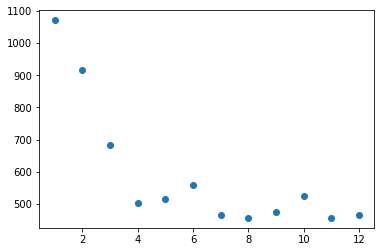

In [65]:
plt.scatter(X, y)


In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[-43.13286713]]
y-axis intercept:  [871.53030303]


Text(0.5, 0, 'Month')

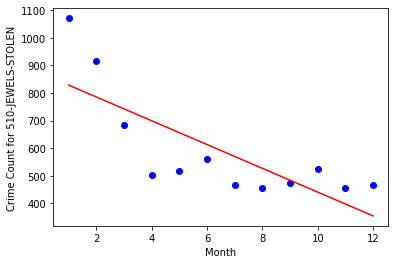

In [67]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 510-JEWELS-STOLEN')
plt.xlabel('Month')

In [68]:
day = model_small_df.groupby('day')
day = day['CrimeCode'].count()
day = day.reset_index()
day.head()

,day,CrimeCode
0,1,242
1,2,220
2,3,259
3,4,237
4,5,225


Shape:  (31, 1) (31, 1)


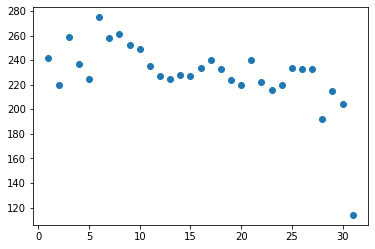

In [69]:
X = day.day.values.reshape(-1, 1)
y = day.CrimeCode.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
plt.scatter(X, y)

Weight coefficients:  [[-1.82620968]]
y-axis intercept:  [258.05806452]


Text(0.5, 0, 'day')

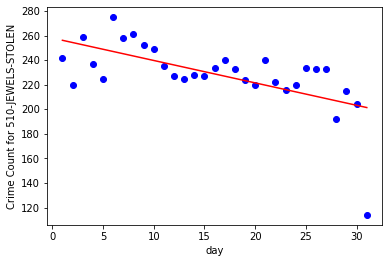

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 510-JEWELS-STOLEN')
plt.xlabel('day')


In [71]:
model_210_df = data.loc[data['CrimeCode'].isin(['210'])]
model_210_df.head()


,DRNumber,CrimeCode,CrimeCodeDescription,PremiseCode,PremiseDescription,rate,year,month,day
73,170100574,210,MURDER,102.0,SIDEWALK,31,2017,1,29
75,170100579,210,MURDER,101.0,STREET,7,2017,1,29
97,170100626,210,MURDER,252.0,"COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, E...",34,2017,2,21
100,170100631,210,MURDER,102.0,SIDEWALK,42,2017,2,22
102,170100634,210,MURDER,516.0,NaN,50,2017,2,24


In [72]:
month = model_210_df.groupby('month')
month = month['CrimeCode'].count()
month = month.reset_index()
month.head()


,month,CrimeCode
0,1,611
1,2,549
2,3,349
3,4,274
4,5,327


Shape:  (12, 1) (12, 1)


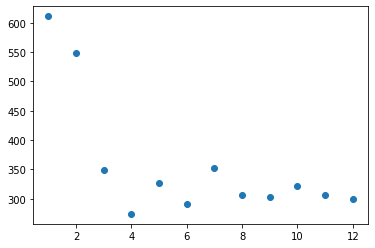

In [73]:
X = month.month.values.reshape(-1, 1)
y = month.CrimeCode.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
plt.scatter(X, y)

Weight coefficients:  [[-19.79020979]]
y-axis intercept:  [486.13636364]


Text(0.5, 0, 'Month')

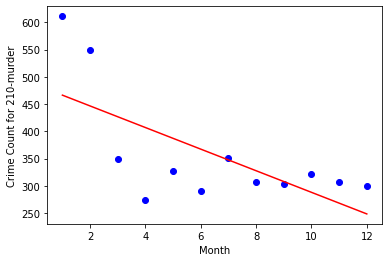

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 210-murder')
plt.xlabel('Month')


In [75]:
day = model_210_df.groupby('day')
day = day['CrimeCode'].count()
day = day.reset_index()
day.head()


,day,CrimeCode
0,1,152
1,2,146
2,3,136
3,4,163
4,5,155


Shape:  (31, 1) (31, 1)


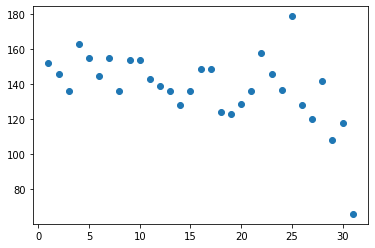

In [76]:
X = day.day.values.reshape(-1, 1)
y = day.CrimeCode.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
plt.scatter(X, y)


Weight coefficients:  [[-1.11693548]]
y-axis intercept:  [156.25806452]


Text(0.5, 0, 'Week')

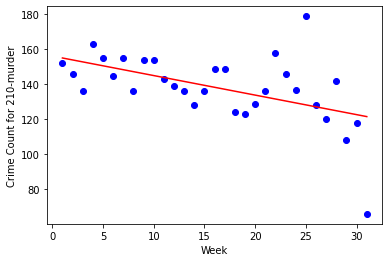

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 210-murder')
plt.xlabel('Week')


In [78]:
model_small_df = data.loc[data['CrimeCode'].isin(['510'])]
model_small_df.head()


,DRNumber,CrimeCode,CrimeCodeDescription,PremiseCode,PremiseDescription,rate,year,month,day
0,170209449,510,JEWELS - STOLEN,101.0,STREET,8,2017,4,21
1,170206243,510,JEWELS - STOLEN,101.0,STREET,21,2017,2,11
2,170311599,510,JEWELS - STOLEN,101.0,STREET,18,2017,4,25
3,170408264,510,JEWELS - STOLEN,101.0,STREET,20,2017,4,7
4,170508584,510,JEWELS - STOLEN,101.0,STREET,42,2017,4,8


In [0]:
model_small_df = model_small_df[['DRNumber','CrimeCode','PremiseCode']]

In [80]:
model_small_df = model_small_df.fillna(0)
model_small_df.reset_index()
model_small_df.head()

,DRNumber,CrimeCode,PremiseCode
0,170209449,510,101.0
1,170206243,510,101.0
2,170311599,510,101.0
3,170408264,510,101.0
4,170508584,510,101.0


In [0]:
model_small_df['DRNumber'] = model_small_df['DRNumber'].apply(pd.to_numeric, errors='coerce')

model_small_df['CrimeCode'] = model_small_df['CrimeCode'].apply(pd.to_numeric, errors='coerce')

model_small_df['PremiseCode'] = model_small_df['PremiseCode'].apply(pd.to_numeric, errors='coerce')

In [82]:
model_small_df = model_small_df.fillna(0)
model_small_df.reset_index()
model_small_df.head(5)

,DRNumber,CrimeCode,PremiseCode
0,170209449,510,101.0
1,170206243,510,101.0
2,170311599,510,101.0
3,170408264,510,101.0
4,170508584,510,101.0


In [83]:
X = model_small_df.drop("PremiseCode", axis=1)
y = model_small_df["PremiseCode"]
print(X.shape, y.shape)

(7094, 2) (7094,)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)


In [85]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


Training Data Score: 0.718796992481203
Testing Data Score: 0.7091319052987599
First 10 Predictions:   [101. 101. 101. 101. 101. 101. 101. 101. 101. 101.]
First 10 Actual labels: [101.0, 101.0, 108.0, 108.0, 101.0, 101.0, 101.0, 108.0, 101.0, 123.0]


In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf = rf.fit(X, y)
rf.score(X, y)


0.8820129687059487

In [87]:
importances = rf.feature_importances_
importances

array([1., 0.])

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50]}
grid = GridSearchCV(classifier, param_grid, verbose=3)

In [89]:
grid.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1 .............................................................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=1, score=0.717, total=   1.2s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ................................. C=1, score=0.717, total=   1.2s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] ................................. C=1, score=0.716, total=   1.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.716, total=   1.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.717, total=   1.2s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.717, total=   1.2s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.717, total=   1.2s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.716, total=   1.1s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.716, total=   1.2s
[CV] C=5 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   23.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [1, 5, 10, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [90]:
print(grid.best_params_)


{'C': 1}


In [91]:
print(grid.best_score_)

0.7163800566759205


In [0]:
predictions = grid.predict(X)

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y, predictions,
                            target_names=['101', '108', '123', '707', '103', '208', '104', '158', '710', '301', '106',
                                          '121', '142', '217', '151', '109', '110', '116', '118', '203', '102',
                                          '107', '122', '255', '705', '502', '213', '501', '416']))


              precision    recall  f1-score   support

         101       0.72      1.00      0.83      5082
         108       0.00      0.00      0.00         4
         123       0.00      0.00      0.00        65
         707       0.00      0.00      0.00       280
         103       0.00      0.00      0.00         2
         208       0.00      0.00      0.00         1
         104       0.00      0.00      0.00      1191
         158       0.00      0.00      0.00         2
         710       0.00      0.00      0.00         1
         301       0.00      0.00      0.00         4
         106       0.00      0.00      0.00        14
         121       0.00      0.00      0.00        14
         142       0.00      0.00      0.00         1
         217       0.00      0.00      0.00        98
         151       0.00      0.00      0.00         2
         109       0.00      0.00      0.00         4
         110       0.00      0.00      0.00         1
         116       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1000)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1000, p=2,
                     weights='uniform')

In [98]:
knn.score(X_test,y_test)

0.7091319052987599

In [99]:
knn.score(X_train,y_train)


0.718796992481203

k: 1, Train/Test Score: 1.000/0.557
k: 3, Train/Test Score: 0.768/0.665
k: 5, Train/Test Score: 0.739/0.681
k: 7, Train/Test Score: 0.730/0.697
k: 9, Train/Test Score: 0.726/0.700
k: 11, Train/Test Score: 0.724/0.703
k: 13, Train/Test Score: 0.723/0.708
k: 15, Train/Test Score: 0.722/0.709
k: 17, Train/Test Score: 0.721/0.708
k: 19, Train/Test Score: 0.720/0.709


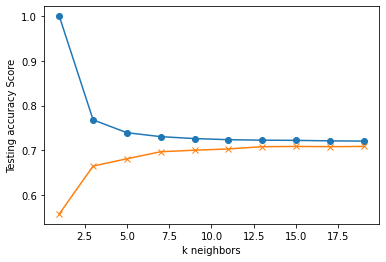

In [100]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()